## 1) Data Loading and Exploration

#### *Purpose: Import necessary libraries and load the dataset.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog
import seaborn as sns

In [5]:
df = pd.read_csv("C:\\Users\\91812\\Downloads\\historical_product_demand.csv")
df.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012/7/27,100
1,Product_0979,Whse_J,Category_028,2012/1/19,500
2,Product_0979,Whse_J,Category_028,2012/2/3,500
3,Product_0979,Whse_J,Category_028,2012/2/9,500
4,Product_0979,Whse_J,Category_028,2012/3/2,500


## 2) Initial Data Check

### Purpose: Understand the dataset structure, types of columns, summary statistics, and check for missing values. 

In [6]:
df.shape
#shows the number of rows and columns.

(1048575, 5)

In [7]:
#provides data types and non-null counts for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 5 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   Product_Code      1048575 non-null  object
 1   Warehouse         1048575 non-null  object
 2   Product_Category  1048575 non-null  object
 3   Date              1037336 non-null  object
 4   Order_Demand      1048575 non-null  object
dtypes: object(5)
memory usage: 40.0+ MB


In [8]:
#gives a statistical summary for numeric columns.
df.describe()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
count,1048575,1048575,1048575,1037336,1048575
unique,2160,4,33,1729,3828
top,Product_1359,Whse_J,Category_019,2013/9/27,1000
freq,16936,764447,481099,2075,112682


In [9]:
#checks for missing values.
df.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of          Product_Code  Warehouse  Product_Category   Date  Order_Demand
0               False      False             False  False         False
1               False      False             False  False         False
2               False      False             False  False         False
3               False      False             False  False         False
4               False      False             False  False         False
...               ...        ...               ...    ...           ...
1048570         False      False             False  False         False
1048571         False      False             False  False         False
1048572         False      False             False  False         False
1048573         False      False             False  False         False
1048574         False      False             False  False         False

[1048575 rows x 5 columns]>

## 3) Convert 'Order_Demand' to Numeric

### Purpose: Ensure 'Order_Demand' is numeric, which is necessary for calculations and analysis.

In [10]:
#Converts Order_Demand to numeric, "Order_Demand" is selected as the primary metric
#because it directly represents the quantity of products that customers are ordering. 
df["Order_Demand"] = pd.to_numeric(df["Order_Demand"],errors="coerce")

## 4) Sorting Dates and Setting Index

#### sorting dates and setting the index to datetime format are preparatory steps that make the dataset ready for accurate and efficient time-based analysis, which is critical for tasks like demand forecasting and inventory optimization.

In [11]:
df. Date.sort_values().unique()[:10]
data= df.set_index('Date')
data.index=pd.to_datetime(df.index)
data

,Product_Code,Warehouse,Product_Category,Order_Demand
1970-01-01 00:00:00.000000000,Product_0993,Whse_J,Category_028,100.0
1970-01-01 00:00:00.000000001,Product_0979,Whse_J,Category_028,500.0
1970-01-01 00:00:00.000000002,Product_0979,Whse_J,Category_028,500.0
1970-01-01 00:00:00.000000003,Product_0979,Whse_J,Category_028,500.0
1970-01-01 00:00:00.000000004,Product_0979,Whse_J,Category_028,500.0
...,...,...,...,...
1970-01-01 00:00:00.001048570,Product_1791,Whse_J,Category_006,1000.0
1970-01-01 00:00:00.001048571,Product_1974,Whse_J,Category_006,1.0
1970-01-01 00:00:00.001048572,Product_1787,Whse_J,Category_006,2500.0
1970-01-01 00:00:00.001048573,Product_0901,Whse_J,Category_023,50.0


## Data Visualization

<Axes: xlabel='Warehouse', ylabel='count'>

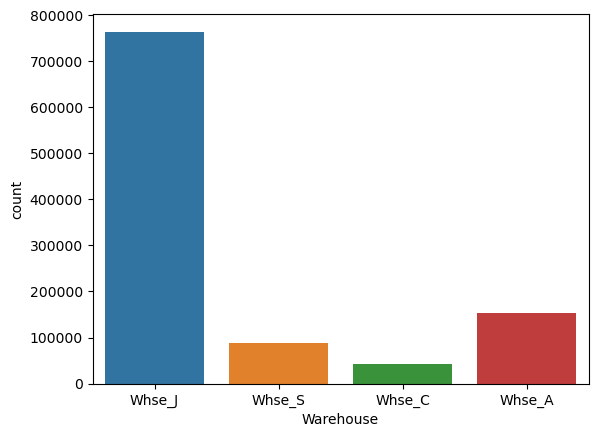

In [12]:
#Visualize the count of records for each warehouse.
sns.countplot(x='Warehouse',data=df)

In [ ]:
#Whse_J" is the busiest warehouse, significantly more active than the others,
#indicating it's likely the central hub for order processing.

In [13]:
warehouse_Demand = data.groupby('Warehouse')['Order_Demand'].sum()
warehouse_Demand

Warehouse
Whse_A    1.511523e+08
Whse_C    5.834583e+08
Whse_J    3.353861e+09
Whse_S    1.036126e+09
Name: Order_Demand, dtype: float64

#### warehouse_Demand gives you the total demand of orders for each warehouse by summing up all the order demands for each warehouse separately.

## Key Metrics Calculation

In [ ]:
#Calculate average demand, initial inventory, and maximum inventory.

In [14]:
demand = df["Order_Demand"].mean()
demand

4936.48800893165

#### The total amount of all products ordered historically.
#### It gives us an idea of how much product has been needed in the past.

In [15]:
initial_inventory = df["Order_Demand"].sum()
initial_inventory # Why: This gives us an idea of how much inventory has been needed in the past.

5124597821.0

#### This is set to twice the initial inventory.
#### It’s a safety buffer to ensure we have enough stock to meet any unexpected increases in demand.

In [16]:
max_inventory = initial_inventory * 2
max_inventory  # preventing overstocking and high storage costs.

10249195642.0

## Optimization Setup

In [17]:
holding_cost = 2 #Cost of holding one unit of inventory per day. 
ordering_cost = 50 #Cost of placing an order. 
holding_days = 30 #Number of days the inventory is held. Here, it's set to 30.

In [18]:
c = [holding_cost * holding_days + ordering_cost]
c

[110]

In [19]:
A= [[-1], [1]]
B=[-demand, max_inventory - initial_inventory]
bounds = [[0,None]]

In [1]:
#The function linprog() is a function used for linear programming optimization in Python.
#In this case, the code successfully found the best solution for the given problem.
#The optimal value for the objective function is around 543013.68, 
#and the decision variable x is determined to be approximately 4936. 
#The output also includes information about the status of the optimization process,
#such as the number of iterations taken, any residuals (differences between actual and optimal values), 
#and the sensitivity of the constraints in the problem.
#Overall, the code ran successfully, found the best solution, 
#and provided detailed information about the optimization process and results.

In [20]:
x = linprog(c, A_ub=A, b_ub=B, bounds= bounds)
x

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: 543013.6809824816
              x: [ 4.936e+03]
            nit: 0
          lower:  residual: [ 4.936e+03]
                 marginals: [ 0.000e+00]
          upper:  residual: [       inf]
                 marginals: [ 0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 0.000e+00  5.125e+09]
                 marginals: [-1.100e+02 -0.000e+00]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0

In [ ]:
#Optimal**: The solution found is the best possible solution given the constraints.
-# **fun**: The optimal value of the objective function (543013.6809824816 in this case).
- #**x**: The optimal values of the decision variables (in this case, x = 4936).
- #**nit**: The number of iterations taken to reach the optimal solution.
- #**residual**: The difference between the actual value and the optimal value for different constraints.
- #**marginals**: The shadow prices or sensitivities of the constraints in the optimization problem.
- #**mip_dual_bound**: The dual bound in mixed-integer programming.
- #**mip_gap**: The optimality gap in mixed-integer programming
,#indicating how far the current best solution is from the best possible solution.

In [46]:
optimal_order_quantity = x.x[0]
total_cost = x.fun
optimal_order_quantity

4936.48800893165

In [47]:
demand_change= 1.2
holding_cost_change= 0.8
lead_time_change= 1.5

In [48]:
new_demand= demand* demand_change
new_holding_cost= holding_cost*holding_cost_change
new_lead_time= holding_days*holding_cost_change

In [49]:
new_demand

5923.7856107179805

In [50]:
new_holding_cost

1.6

In [51]:
new_lead_time

24.0

In [56]:
    new_demand = demand * demand_change
    new_holding_cost = holding_cost * holding_cost_change
    new_lead_time= holding_days * holding_cost_change
    new_c = [new_holding_cost + ordering_cost]
    new_b = [-new_demand, max_inventory - initial_inventory]
    new_x = linprog(new_c, A_ub=A, b_ub=new_b, bounds=bounds)
    new_optimal_order_quantity = new_x.x[0]

In [59]:
    new_demand = demand * demand_change
    new_holding_cost = holding_cost * holding_cost_change
    new_lead_time= holding_days * holding_cost_change
    new_c = [new_holding_cost + ordering_cost]
    new_b = [-new_demand, max_inventory - initial_inventory]
    new_x = linprog(new_c, A_ub=A, b_ub=new_b, bounds=bounds)
    new_total_cost = new_x.fun

## Sensitivity_analysis

### Purpose: Analyze how changes in demand, holding costs, and lead time affect optimal order quantity and total costs.

In [60]:
def sensitivity_analysis(demand_change, holding_cost_change, lead_time_change):
    new_demand = demand * demand_change
    new_holding_cost = holding_cost * holding_cost_change
    new_lead_time= holding_days * holding_cost_change
    new_c = [new_holding_cost + ordering_cost]
    new_b = [-new_demand, max_inventory - initial_inventory]
    new_x = linprog(new_c, A_ub=A, b_ub=new_b, bounds=bounds)
    new_optimal_order_quantity = new_x.x[0]
    new_total_cost = new_x.fun
    return new_optimal_order_quantity, new_total_cost
   


In [61]:
new_optimal_order_quantity 

5923.7856107179805

In [62]:
new_total_cost

305667.3375130478

In [71]:
optimal_order_quantity_sensitivity, total_cost_sensitivity = sensitivity_analysis(
    demand_change, holding_cost_change, lead_time_change)

In [74]:
print ("Sensitivity Analysis:")
print ("Optimal Order Quantity Sensitivity :", optimal_order_quantity_sensitivity)
print ("Total Cost Sensitivity:",total_cost_sensitivity)


Sensitivity Analysis:
Optimal Order Quantity Sensitivity : 5923.7856107179805
Total Cost Sensitivity: 305667.3375130478


## Visualizations

## *Total Cost Comparison Chart

### Purpose: To compare the total inventory costs between the original scenario and the sensitivity analysis scenario.

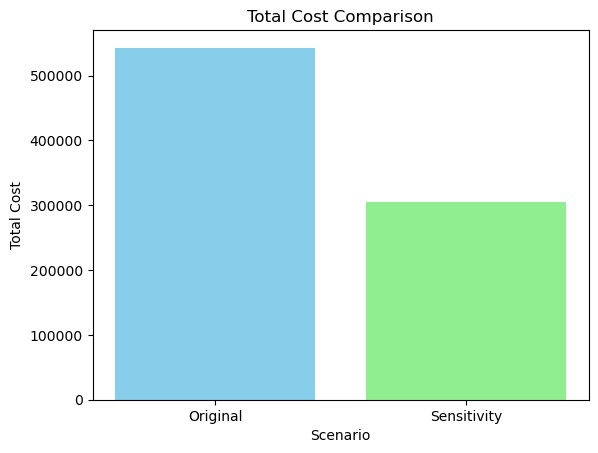

In [83]:
labels = ["Original", "Sensitivity"]
total_costs = [total_cost, total_cost_sensitivity]
plt.bar(labels, total_costs, color=['skyblue', 'lightgreen'])
plt.xlabel("Scenario")
plt.ylabel("Total Cost")
plt.title("Total Cost Comparison")
plt.show()

### Observation: The total cost in the sensitivity scenario is lower than in the original scenario, indicating that the changes made have resulted in cost savings.

## *Optimal Order Quantity Chart

### Purpose: To compare the optimal order quantities between the original scenario and the sensitivity analysis scenario.

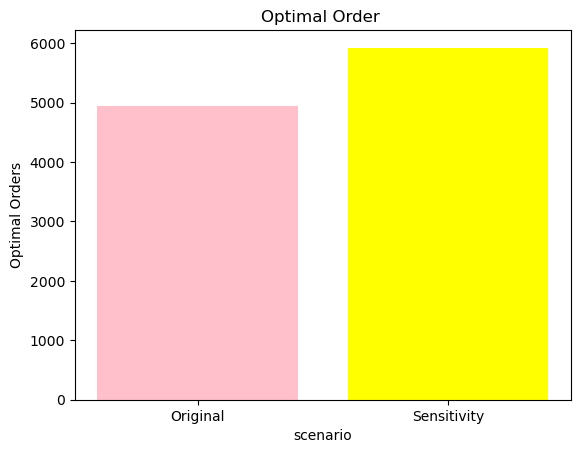

In [81]:
labels = ["Original", "Sensitivity"]
optimal_orders = [optimal_order_quantity, optimal_order_quantity_sensitivity]
plt.bar(labels, optimal_orders, color=['pink', 'yellow'])
plt.xlabel("scenario")
plt.ylabel("Optimal Orders")
plt.title("Optimal Order ")
plt.show()

### Observation: The optimal order quantity in the sensitivity scenario is higher than in the original scenario. This means that the changes led to a recommendation to order more items to minimize costs.